<a href="https://colab.research.google.com/github/sayan0506/Agriculture-project-notes-and-references/blob/main/Potato_Leaf_Classifer_without_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Potato Leaf Classifier with Augmentation


# Import Modules

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import pandas as pd
import seaborn as sns

import tensorflow as tf
from keras.preprocessing.image import img_to_array

# Dataset Download

Download **Plant Village dataset without augmentation** from the following

Published in: **18-04-2019**

[Plant_leaf_diseases_Mendeley_dataset](https://data.mendeley.com/datasets/tywbtsjrjv/1)


In [ ]:
!wget https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded

--2021-03-22 17:04:13--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/d29ed9b2-8a5d-4663-8a82-c9174f2c7066 [following]
--2021-03-22 17:04:14--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/d29ed9b2-8a5d-4663-8a82-c9174f2c7066
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.30.216
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.30.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 868032562 (828M) [applicati

## Unzipping

In [ ]:
# content directory
content_dir = '/content/Plant Village Original'

# zip
zip_file = '/content/file_downloaded' 

# 'Plant Village Original' directory to unzip
if not os.path.isdir(content_dir):
  os.mkdir(content_dir)

# unzipping
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
  zip_ref.extractall(content_dir)

# Data Inspection

In [ ]:
# image directory
img_dir = "/content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation"

Checking potato leaf samples category

In [ ]:
# total classifiers
classifiers_list = os.listdir(img_dir)
print(f'TOtal Classifiers {len(classifiers_list)}\n')
for i in classifiers_list:
  print(f'{i}')

TOtal Classifiers 39

Corn___Cercospora_leaf_spot Gray_leaf_spot
Apple___Black_rot
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Tomato___Late_blight
Strawberry___Leaf_scorch
Cherry___Powdery_mildew
Peach___healthy
Apple___Cedar_apple_rust
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Leaf_Mold
Raspberry___healthy
Potato___healthy
Peach___Bacterial_spot
Strawberry___healthy
Orange___Haunglongbing_(Citrus_greening)
Blueberry___healthy
Tomato___Bacterial_spot
Apple___Apple_scab
Tomato___Target_Spot
Tomato___Spider_mites Two-spotted_spider_mite
Corn___healthy
Cherry___healthy
Grape___Esca_(Black_Measles)
Potato___Late_blight
Apple___healthy
Squash___Powdery_mildew
Pepper,_bell___healthy
Grape___Black_rot
Pepper,_bell___Bacterial_spot
Corn___Northern_Leaf_Blight
Tomato___Septoria_leaf_spot
Potato___Early_blight
Grape___healthy
Tomato___healthy
Soybean___healthy
Tomato___Early_blight
Tomato___Tomato_mosaic_virus
Background_without_leaves
Corn___Common_rust


## Potato Leaf Samples

In [ ]:
# Potato Disease Classifiers
potato_classifiers = [disease for disease in classifiers_list if disease.split('_')[0] == 'Potato']
print(f'Potato disease categories in the dataset\n{potato__classifiers}')

Potato disease categories in the dataset
['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight']


Function for image to array conversion using keras  

In [ ]:
def convert_img_to_array(image_path):
  try:
    img = plt.imread(image_path)
    if img is not None:
      return img_to_array(img)
    else:
      return np.array([])
  
  except Exception as e:
    print(f'Error {e}')
    return None


Fetching Potato images for 3 classes

In [ ]:
# main image directory
img_dir = "/content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation"
potato_classifiers_path = [os.path.join(img_dir, disease) for disease in potato_classifiers]

print(f'Image directory {img_dir}\n')
print(f'Potato directory names list {potato_classifiers_path}')

Image directory /content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation

Potato directory names list ['/content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation/Potato___healthy', '/content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation/Potato___Late_blight', '/content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation/Potato___Early_blight']


In [118]:
# image array list
image_list = []
# image labels list
label_list = []
# label_dataframe
label_df = pd.DataFrame(columns=potato__classifiers)
# image dataframe
img_df = pd.DataFrame(columns=['Image', 'Shape', 'Label'])

try:
  print('[INFO] Loading images ...')
  # total sample count
  sample_count = 0
  for sr, potato_disease_path in enumerate(potato_classifiers_path):
    print(f'[INFO] Processing {potato_classifiers[sr]}')
    sample_list = os.listdir(potato_disease_path)
    #print(len(sample_list))
    for disease_sample in sample_list:
      # removing the .DS_store files from list, which contains the folder infos
      if disease_sample == '.DS_store':
        sample_list.remove(disease_sample)
    # categorical count
    count = 0
    for disease_sample in sample_list:
      disease_sample_path = os.path.join(potato_disease_path, disease_sample)
      if disease_sample_path.endswith(".jpg") == True or disease_sample_path.endswith(".JPG") == True:
        img = convert_img_to_array(disease_sample_path)
        image_list.append(img)
        label_list.append(potato_classifiers[sr])
        img_df.loc[sample_count,'Image'], img_df.loc[sample_count,'Label'] = disease_sample, potato_classifiers[sr]
        img_df.loc[sample_count,'Shape'] = img.shape
        count += 1
        sample_count += 1
    label_df.loc[0, potato_classifiers[sr]] = count 
    
except Exception as e:
  print(f'Error {e}')

[INFO] Loading images ...
[INFO] Processing Potato___healthy
[INFO] Processing Potato___Late_blight
[INFO] Processing Potato___Early_blight


In [103]:
# Data loading check
if len(image_list) == len(label_list):
  print('Check Successful')
  print(f'Total Potato Image samples {len(image_list)}\n')
  print('Label dataframe')
  
else:
  print('Verify Dataloader')

label_df

Check Successful
Total Potato Image samples 2152

Label dataframe


,Potato___healthy,Potato___Late_blight,Potato___Early_blight
0,152,1000,1000


## Target Analysis

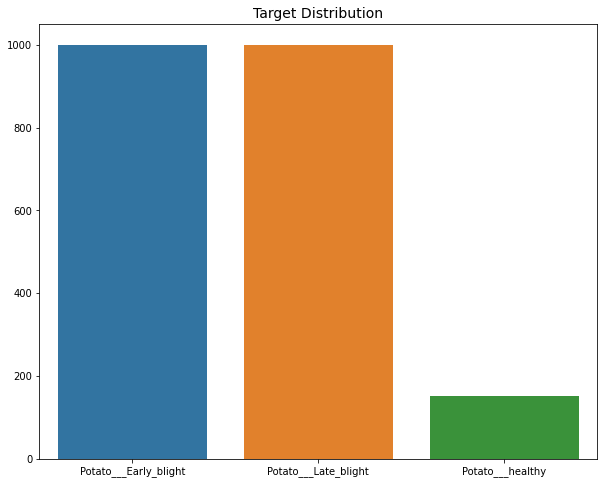

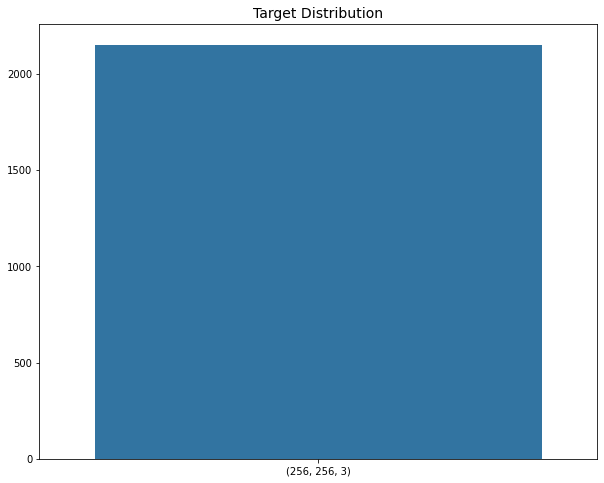

In [128]:
# target distribution visualize
def distribution(counts_series):
  plt.figure(figsize=(14,10))
  sns.barplot(x = counts_series.index, y = counts_series.values, )
  plt.title('Target Distribution without Augmentation', fontsize=14)

# returns pandas series with classes as keys and count as values
target_counts = img_df['Label'].value_counts()

# shape analysis
shape_counts = img_df['Shape'].value_counts()

# visualize target
target(target_counts)

# visualize shapes
target(shape_counts)

In [85]:
label_df.loc[0,potato_classifiers[sr]] = 1000